In [206]:
import pandas as pd
import matplotlib as mat
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.stats.api as sms

# Načítanie dát

In [2]:
filename = "056/stations.csv"
stations = pd.read_csv(filename, sep='\t')
stations.head()

,location,longitude,latitude,code,QoS,revision
0,Europe/Madrid,-3.67029,37.13548,ES,excellent,"09/03/2019, 00:00:00"
1,Europe/Moscow,38.02486,55.64776,RU,good,2016/02/19
2,America/Chicago,-96.67834,34.77453,US,accep,2021-12-01
3,Europe/Madrid,-1.60452,42.06166,ES,maintenance,2013/10/10
4,Europe/Rome,14.66737,41.55947,IT,accep,2014-03-19


In [3]:
filename = "056/measurements.csv"
measurements = pd.read_csv(filename, sep='\t')
measurements.head()

,PM10,PM2.5,NOx,H2CO,C2H3NO5,latitude,SO2,CH4,longitude,warning,Pb,NH3,CO,TEMP,PAHs,PRES,O3,CFCs
0,6.07813,6.90744,7.44757,51.23122,0.91974,-3.54030,9.25688,6.77244,118.97070,1.0,48.46927,6.07986,10.45577,14.03811,6.94818,1087.24088,8.02733,52.77749
1,6.89207,6.86753,6.85062,71.06533,0.75735,29.84576,7.38494,8.66439,-90.10674,1.0,54.47649,9.86305,NaN,-4.37317,7.33664,1083.34731,9.44859,36.58768
2,6.71169,7.61585,6.23239,47.02258,0.57216,39.22493,7.00606,8.13021,42.85693,1.0,57.78387,7.74024,6.78884,22.50115,8.17039,1183.22224,9.04095,49.74612
3,7.94116,7.92634,6.34301,56.11317,1.75908,22.75218,9.05054,9.14375,72.68533,1.0,60.30825,8.88709,8.90107,14.30922,6.49171,1061.30457,8.75014,58.34216
4,7.24979,7.93798,9.92143,47.00608,1.40903,-26.93366,9.19513,6.49613,29.24152,0.0,13.35131,6.85893,10.45672,13.65876,7.25242,1071.05974,9.00307,60.36269


In [4]:
measurements.columns.values

array(['PM10', 'PM2.5', 'NOx', 'H2CO', 'C2H3NO5', 'latitude', 'SO2',
       'CH4', 'longitude', 'warning', 'Pb', 'NH3', 'CO', 'TEMP', 'PAHs',
       'PRES', 'O3', 'CFCs'], dtype=object)

In [5]:
measurements = measurements[['warning','PM10', 'PM2.5', 'NOx', 'H2CO', 'C2H3NO5','SO2',
       'CH4','Pb', 'NH3', 'CO', 'PAHs', 'O3', 'CFCs', 'PRES', 'TEMP', 'longitude', 'latitude']]
measurements

,warning,PM10,PM2.5,NOx,H2CO,C2H3NO5,SO2,CH4,Pb,NH3,CO,PAHs,O3,CFCs,PRES,TEMP,longitude,latitude
0,1.0,6.07813,6.90744,7.44757,51.23122,0.91974,9.25688,6.77244,48.46927,6.07986,10.45577,6.94818,8.02733,52.77749,1087.24088,14.03811,118.97070,-3.54030
1,1.0,6.89207,6.86753,6.85062,71.06533,0.75735,7.38494,8.66439,54.47649,9.86305,NaN,7.33664,9.44859,36.58768,1083.34731,-4.37317,-90.10674,29.84576
2,1.0,6.71169,7.61585,6.23239,47.02258,0.57216,7.00606,8.13021,57.78387,7.74024,6.78884,8.17039,9.04095,49.74612,1183.22224,22.50115,42.85693,39.22493
3,1.0,7.94116,7.92634,6.34301,56.11317,1.75908,9.05054,9.14375,60.30825,8.88709,8.90107,6.49171,8.75014,58.34216,1061.30457,14.30922,72.68533,22.75218
4,0.0,7.24979,7.93798,9.92143,47.00608,1.40903,9.19513,6.49613,13.35131,6.85893,10.45672,7.25242,9.00307,60.36269,1071.05974,13.65876,29.24152,-26.93366
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12169,NaN,7.58456,7.41185,9.01807,43.69266,1.68243,9.10369,8.36727,65.70805,8.24257,5.52890,8.36396,9.73211,46.11593,1075.61545,29.57748,3.16667,50.80000
12170,0.0,5.74855,8.36009,10.75456,64.40738,0.70585,9.00905,6.48997,73.36845,6.78368,8.39770,7.77534,10.80141,60.41999,1099.99018,6.07631,72.54566,29.69221
12171,1.0,6.62581,8.48517,8.78707,42.66208,1.04290,6.91674,6.74135,45.61484,8.15148,NaN,8.37174,8.75397,37.86532,1159.79929,12.25277,-94.41551,39.09112
12172,0.0,6.14287,10.14225,8.91822,50.63934,1.12318,6.84232,5.97282,83.30848,6.42240,9.95384,5.39309,8.37867,52.66191,1188.73752,24.92561,91.00632,26.32293


# Základný opis dát

## *Dataset STATIONS*

Dataset stations.csv obsahuje 1006 záznamov o miestach, kde sa nachádzajú meracie stanice. V datasete sa nachádza 6 atribútov. 

In [6]:
len(stations)

1006

In [7]:
len(stations.columns)

6

In [8]:
stations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1006 entries, 0 to 1005
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   location   1006 non-null   object 
 1   longitude  1006 non-null   float64
 2   latitude   1006 non-null   float64
 3   code       1006 non-null   object 
 4   QoS        1006 non-null   object 
 5   revision   1006 non-null   object 
dtypes: float64(2), object(4)
memory usage: 47.3+ KB


Môžeme vidieť, že datase obsahuje 2 typy atribútov, object a float.

In [9]:
stations.describe()

,longitude,latitude
count,1006.000000,1006.000000
mean,11.909048,30.133826
std,72.318984,22.215059
min,-156.474320,-54.800000
25%,-53.020555,19.042220
50%,10.039880,36.794710
75%,71.648072,45.448335
max,178.004170,68.798330


## Významné atribúty

Atribúty z datasetu stations.csv, ktoré budú pre nás významné sú longitude, latitude a revision.

Counter({'US': 175, 'IN': 68, 'DE': 58, 'RU': 50, 'GB': 49, 'CN': 45, 'BR': 41, 'JP': 30, 'IT': 29, 'FR': 25, 'PK': 24, 'ES': 22, 'PH': 18, 'MX': 17, 'NG': 16, 'ID': 14, 'PL': 13, 'TR': 13, 'UA': 13, 'CO': 11, 'CA': 11, 'AU': 10, 'MM': 10, 'DZ': 9, 'UZ': 9, 'BE': 8, 'IR': 8, 'MT': 7, 'TZ': 7, 'NL': 7, 'TN': 6, 'AR': 6, 'SY': 5, 'MY': 5, 'IL': 5, 'VE': 5, 'KZ': 5, 'MG': 5, 'ZA': 5, 'PT': 5, 'TH': 4, 'BY': 4, 'CU': 4, 'KR': 4, 'MA': 4, 'RS': 4, 'CZ': 4, 'HK': 4, 'LT': 3, 'KH': 3, 'NZ': 3, 'MK': 3, 'ET': 3, 'UG': 3, 'CH': 3, 'CI': 3, 'CM': 3, 'KE': 3, 'RW': 3, 'PA': 3, 'LK': 3, 'CL': 2, 'NO': 2, 'GH': 2, 'AM': 2, 'UY': 2, 'MZ': 2, 'XK': 2, 'CR': 2, 'BD': 2, 'EG': 2, 'MW': 2, 'HN': 2, 'VU': 2, 'CD': 2, 'PR': 2, 'BG': 2, 'SD': 2, 'PE': 2, 'SK': 2, 'TW': 1, 'BJ': 1, 'HR': 1, 'LY': 1, 'RE': 1, 'FI': 1, 'GN': 1, 'EC': 1, 'TT': 1, 'MQ': 1, 'AT': 1, 'AF': 1, 'SE': 1, 'JM': 1, 'IQ': 1, 'PG': 1, 'NI': 1, 'GE': 1, 'IE': 1, 'TD': 1, 'ME': 1, 'YE': 1, 'GA': 1, 'LR': 1, 'AO': 1, 'AD': 1, 'DO': 1, 'KG'

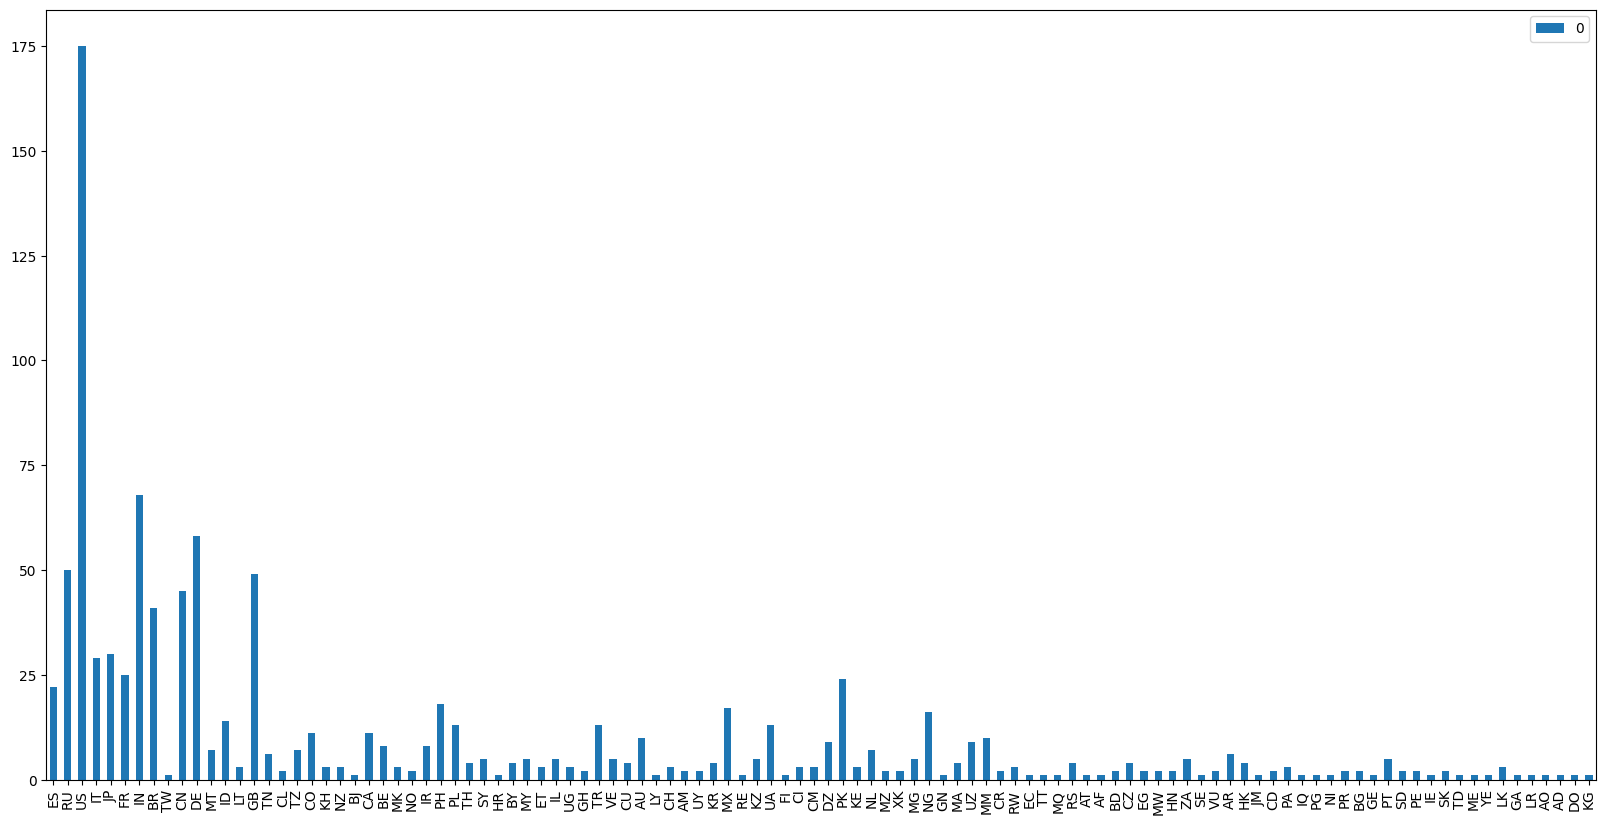

In [10]:
count = Counter(stations.code)
df = stations.from_dict(count, orient='index')
df.plot(kind='bar', figsize=(20,10))
print(count)

Môžeme vidieť, že záznamy z datasetu *stations* sú z rôznych kútov sveta.

# *Dataset MEASUREMENTS*

Dataset measurements obsahuje 12 174 záznamov o prvkoch, ktoré ovplyvňujú kvalitu ovzdušia.

In [11]:
measurements.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12174 entries, 0 to 12173
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   warning    12124 non-null  float64
 1   PM10       12123 non-null  float64
 2   PM2.5      12125 non-null  float64
 3   NOx        12126 non-null  float64
 4   H2CO       12125 non-null  float64
 5   C2H3NO5    12126 non-null  float64
 6   SO2        12126 non-null  float64
 7   CH4        12125 non-null  float64
 8   Pb         12125 non-null  float64
 9   NH3        12126 non-null  float64
 10  CO         12125 non-null  float64
 11  PAHs       12125 non-null  float64
 12  O3         12126 non-null  float64
 13  CFCs       12126 non-null  float64
 14  PRES       12174 non-null  float64
 15  TEMP       12126 non-null  float64
 16  longitude  12174 non-null  float64
 17  latitude   12174 non-null  float64
dtypes: float64(18)
memory usage: 1.7 MB


In [12]:
measurements.describe()

,warning,PM10,PM2.5,NOx,H2CO,C2H3NO5,SO2,CH4,Pb,NH3,CO,PAHs,O3,CFCs,PRES,TEMP,longitude,latitude
count,12124.00000,12123.000000,12125.000000,12126.000000,12125.000000,12126.000000,12126.000000,12125.000000,12125.000000,12126.000000,12125.000000,12125.000000,12126.000000,12126.000000,12174.000000,12126.000000,12174.000000,12174.000000
mean,0.59609,6.919483,8.213583,7.963519,50.753811,1.764245,8.209883,7.694104,49.206273,8.217021,8.214122,7.407877,8.723927,54.154490,1125.413018,14.968950,12.027094,30.121407
std,0.49070,1.315780,0.989272,1.872312,12.038081,2.926322,0.991732,1.867213,13.271783,0.998970,1.881634,1.789924,1.651227,12.065492,43.317750,10.058517,72.325880,22.175627
min,0.00000,1.686900,4.639680,1.376560,0.000000,0.000000,4.503160,2.021600,0.000000,4.014580,1.849170,0.000000,3.794800,0.000000,1050.005850,-24.474380,-156.474320,-54.800000
25%,0.00000,6.086890,7.552680,6.603582,42.565630,0.808565,7.541690,6.389860,40.219730,7.550548,6.828870,6.178460,7.468100,45.996005,1088.353560,8.217168,-53.137220,19.042220
50%,1.00000,6.928160,8.222340,7.780655,50.750040,1.132815,8.200010,7.512880,49.132480,8.218010,8.319660,7.264160,8.883305,54.154415,1125.170885,14.923440,10.039880,36.746595
75%,1.00000,7.765475,8.877080,9.277013,58.802070,1.741622,8.884127,8.849010,58.079720,8.882397,9.609000,8.485640,9.918350,62.295505,1163.101688,21.733403,72.344240,45.447300
max,1.00000,12.265880,12.089560,17.840410,100.000000,100.000000,11.899680,17.293770,100.000000,12.470050,14.581490,14.657650,15.494760,100.000000,1199.998520,54.542470,178.004170,68.798330


## Významné atribúty

Atribúty v datasete measurements.csv, sú näjma atribúty číselené, preto je veľa z nich významných. Budeme pozorovať rôzne vzťahy a závislosti medzi týmito dátami. Najvýznamnejší atribút je ale atribút 'warning', podľa ktorého sa predikuje kvalita ovzdušia.

Poďla sĺpcov longitude a latitude budeme schopní prepojiť obe tabuľky, pretože v oboch tabulkách sa tieto údaje nachádzajú.

In [13]:
measurements['warning'].value_counts()

1.0    7227
0.0    4897
Name: warning, dtype: int64

<AxesSubplot: xlabel='warning', ylabel='count'>

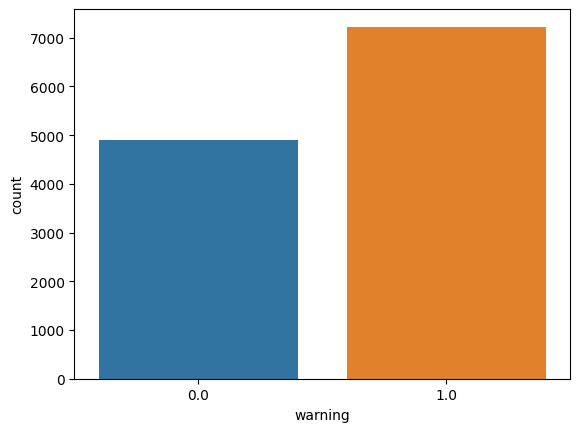

In [14]:
sns.countplot(data=measurements, x="warning")

Náhodne sme vybrali 2 prvky na ukážku dát.

In [15]:
measurements.NOx.describe()

count    12126.000000
mean         7.963519
std          1.872312
min          1.376560
25%          6.603582
50%          7.780655
75%          9.277013
max         17.840410
Name: NOx, dtype: float64

<AxesSubplot: ylabel='NOx'>

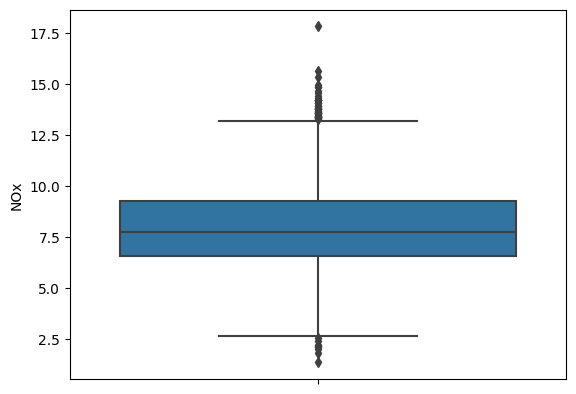

In [16]:
sns.boxplot(y=measurements.NOx)

<AxesSubplot: xlabel='NOx', ylabel='Count'>

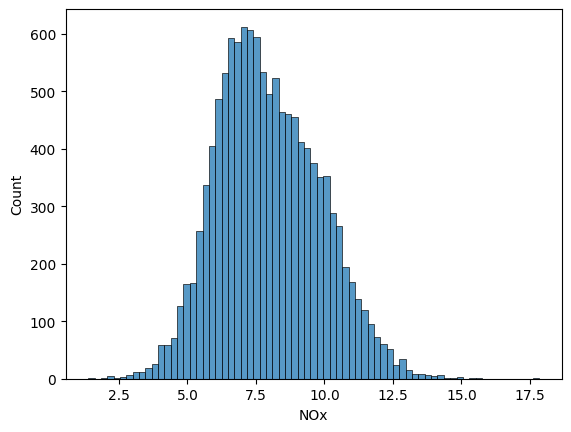

In [17]:
sns.histplot(measurements.NOx)

In [18]:
measurements['C2H3NO5'].describe()

count    12126.000000
mean         1.764245
std          2.926322
min          0.000000
25%          0.808565
50%          1.132815
75%          1.741622
max        100.000000
Name: C2H3NO5, dtype: float64

<AxesSubplot: ylabel='C2H3NO5'>

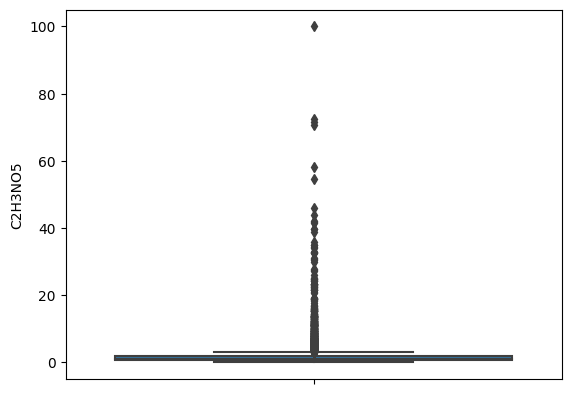

In [19]:
sns.boxplot(y=measurements['C2H3NO5'])

<AxesSubplot: xlabel='C2H3NO5', ylabel='Count'>

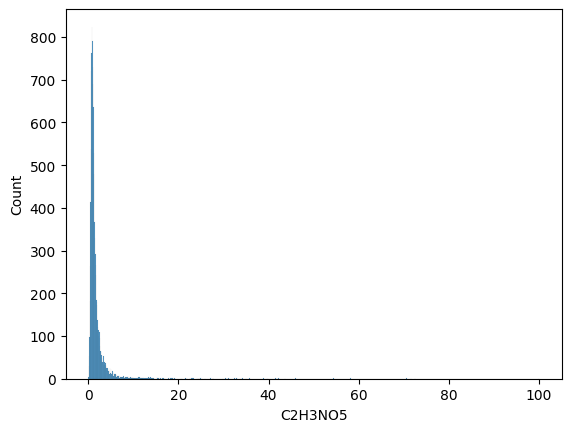

In [20]:
sns.histplot(measurements['C2H3NO5'])

## Parova analyza vsetkych

In [21]:
correlation = measurements.corr()
correlation

,warning,PM10,PM2.5,NOx,H2CO,C2H3NO5,SO2,CH4,Pb,NH3,CO,PAHs,O3,CFCs,PRES,TEMP,longitude,latitude
warning,1.000000,-0.017601,0.011121,-0.654096,0.013271,-0.002433,0.005971,0.332975,-0.005167,0.013857,0.005499,-0.335992,-0.359314,-0.021758,0.011904,0.007584,-0.009355,-0.007093
PM10,-0.017601,1.000000,-0.000196,0.175628,0.009074,0.564211,-0.008184,-0.243767,0.008031,0.003704,-0.137143,-0.123970,-0.034166,-0.003491,0.002873,-0.019110,0.004932,-0.005200
PM2.5,0.011121,-0.000196,1.000000,-0.009515,0.010516,0.001285,-0.007111,0.012705,0.000174,0.016112,-0.005479,0.000202,0.001217,-0.005098,0.000946,-0.001793,-0.000691,0.006367
NOx,-0.654096,0.175628,-0.009515,1.000000,-0.000369,0.105451,0.003584,-0.128795,0.002437,-0.003344,-0.220757,0.346565,0.330133,0.025220,-0.021748,-0.002917,-0.003642,0.013269
H2CO,0.013271,0.009074,0.010516,-0.000369,1.000000,0.008298,-0.013527,0.017084,-0.015172,-0.005034,-0.009615,-0.009978,-0.002757,-0.007302,-0.003545,-0.002522,-0.003179,0.000814
C2H3NO5,-0.002433,0.564211,0.001285,0.105451,0.008298,1.000000,-0.010180,-0.144388,-0.005125,-0.009933,-0.170779,-0.045804,0.028989,0.013874,-0.004625,-0.007260,-0.003250,0.020838
SO2,0.005971,-0.008184,-0.007111,0.003584,-0.013527,-0.010180,1.000000,0.012807,-0.004739,0.012796,0.007655,-0.003398,0.008873,-0.004393,-0.002212,0.002921,0.006677,-0.001448
CH4,0.332975,-0.243767,0.012705,-0.128795,0.017084,-0.144388,0.012807,1.000000,-0.003940,0.008298,-0.273300,-0.123922,0.198528,-0.008333,0.001585,-0.004866,-0.004999,0.004750
Pb,-0.005167,0.008031,0.000174,0.002437,-0.015172,-0.005125,-0.004739,-0.003940,1.000000,0.018328,0.001069,-0.021811,-0.011248,0.011217,0.008248,-0.011855,0.006785,-0.014420
NH3,0.013857,0.003704,0.016112,-0.003344,-0.005034,-0.009933,0.012796,0.008298,0.018328,1.000000,-0.004412,-0.018180,-0.014089,-0.004206,-0.001437,0.013161,0.010694,0.010369


<AxesSubplot: >

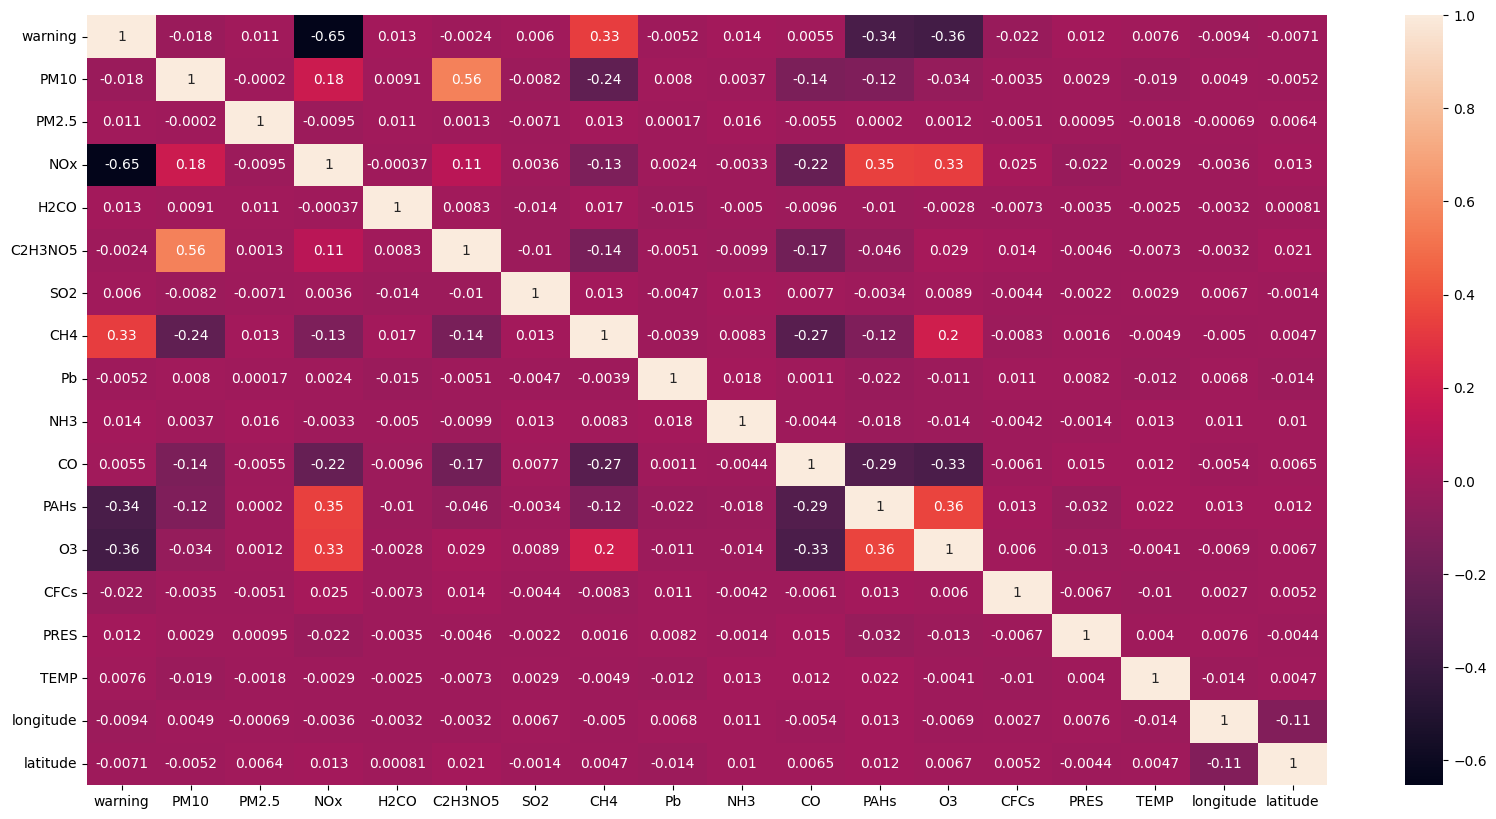

In [22]:
plt.figure(figsize=(20,10))
sns.heatmap(correlation, annot=True)

Podla korelačnej tabulky sme zistili, ze s premennou hodnotou warning nam signifikatne súvisia 4 hodnoty. 

To su:
- NOx
- CH4
- PAHs
- O3

Ostatné atribúty majú takmer nulovú koreláciu, čo znamená že tieto prvky nám nejak neposkytujú žiadnu informáciu o predikovanej hodnote.

#  Úprava dát na analyzovanie outliers

Na ďalšiu analýzu dát potrebujme dané dáta vyčistiť a odstrániť chyby, ako napríklad:
- Duplicitné záznamy
- Chýbajúce záznamy
- Neznáme záznamy
- Vychýlené záznamy


Teraz zistíme, ci tieto hodnoty nie sú skreslené kvoli outlierom. Tak ich z dát vyfiltrujeme.

In [23]:
# funkcia na identifikovanie outliers
def identify_outliers(a):
        lower = a.quantile(0.25) - 1.5 * stats.iqr(a)
        upper = a.quantile(0.75) + 1.5 * stats.iqr(a)
        return a[(a > upper) | (a < lower)]

In [24]:
measurements_columns = measurements.columns.values
print(measurements_columns)
print(measurements_columns[1:16])

['warning' 'PM10' 'PM2.5' 'NOx' 'H2CO' 'C2H3NO5' 'SO2' 'CH4' 'Pb' 'NH3'
 'CO' 'PAHs' 'O3' 'CFCs' 'PRES' 'TEMP' 'longitude' 'latitude']
['PM10' 'PM2.5' 'NOx' 'H2CO' 'C2H3NO5' 'SO2' 'CH4' 'Pb' 'NH3' 'CO' 'PAHs'
 'O3' 'CFCs' 'PRES' 'TEMP']


Rozhodli sme sa pre vymazanie neznámych údajov, aby sme si nepokazili koreláciu tým, že neznáme záznamy nahradíme priemerom.

In [25]:
before=len(measurements)
measurements=measurements.drop_duplicates()
print("Počet duplikátov: ",before-len(measurements))

Počet duplikátov:  180


In [26]:
df_measurements = pd.DataFrame(measurements)
# df_measurements

In [27]:
def replace_zero(df, columns):
    for item in columns:
#         print(item)
        df[item] = df[item].replace(0, np.nan)
        
    return df

measurements = replace_zero(df_measurements, measurements_columns[1:16])    

In [28]:
before=len(measurements)
measurements=measurements.dropna()
print("Počet neznamych záznamov: ",before-len(measurements))

Počet neznamych záznamov:  700


In [29]:
measurements_drop_zero = measurements[['PM10', 'PM2.5', 'NOx', 'H2CO', 'C2H3NO5','SO2',
       'CH4','Pb', 'NH3', 'CO', 'PAHs', 'O3', 'CFCs', 'PRES', 'TEMP']]
measurements_drop_zero[(measurements_drop_zero.values == 0).any(axis=1)].index

Int64Index([], dtype='int64')

Vymazanie outlierov zo všetkych stĺcov okrem 'warning', 'longitude' a 'latitude'

In [30]:
def delete_outliers(df, columns):
    c = 0
    for item in columns:
        col = df[item]
        print(item)
        col = col.dropna()
        col_out = identify_outliers(col)
        print("COUNT: ", col_out.count())
        c = c + col_out.count()
        measurements_dropped = df.drop(col_out.index)
        df = measurements_dropped
        
    print("Total COUNT:", c)    
    return df

In [31]:
measurements_filtered = delete_outliers(measurements, measurements_columns[1:16])

PM10
COUNT:  162
PM2.5
COUNT:  78
NOx
COUNT:  43
H2CO
COUNT:  79
C2H3NO5
COUNT:  1005
SO2
COUNT:  67
CH4
COUNT:  76
Pb
COUNT:  77
NH3
COUNT:  70
CO
COUNT:  20
PAHs
COUNT:  134
O3
COUNT:  0
CFCs
COUNT:  68
PRES
COUNT:  0
TEMP
COUNT:  60
Total COUNT: 1939


In [32]:
print("Old: ", measurements.shape)
print("New: ", measurements_filtered.shape)

Old:  (11294, 18)
New:  (9355, 18)


In [33]:
# measurements[(measurements_drop_zero.values == 100).any(axis=1)].index
#type(measurements_filtered)

Po odstránení 1939 riadkov s outlier hodnotami mame celkovo 9355 záznamov.

In [34]:
measurements_filtered.head()

,warning,PM10,PM2.5,NOx,H2CO,C2H3NO5,SO2,CH4,Pb,NH3,CO,PAHs,O3,CFCs,PRES,TEMP,longitude,latitude
0,1.0,6.07813,6.90744,7.44757,51.23122,0.91974,9.25688,6.77244,48.46927,6.07986,10.45577,6.94818,8.02733,52.77749,1087.24088,14.03811,118.97070,-3.54030
2,1.0,6.71169,7.61585,6.23239,47.02258,0.57216,7.00606,8.13021,57.78387,7.74024,6.78884,8.17039,9.04095,49.74612,1183.22224,22.50115,42.85693,39.22493
3,1.0,7.94116,7.92634,6.34301,56.11317,1.75908,9.05054,9.14375,60.30825,8.88709,8.90107,6.49171,8.75014,58.34216,1061.30457,14.30922,72.68533,22.75218
6,0.0,5.35159,8.04584,10.38949,61.06825,0.57421,7.74147,7.36028,43.36347,8.56427,8.45958,10.51928,9.72010,47.76304,1078.52564,15.80289,3.87723,43.61092
7,0.0,8.06389,7.83814,6.97412,43.09657,2.49572,9.32221,5.71384,51.27422,7.51574,5.34092,9.99269,10.29931,80.83883,1095.05584,6.54310,-73.97069,40.64621


# Dáta po uprave

Ukážka dát po čistení.

In [35]:
measurements_filtered['NOx'].describe()

count    9355.000000
mean        7.886935
std         1.820047
min         2.648970
25%         6.542945
50%         7.712180
75%         9.205860
max        13.225360
Name: NOx, dtype: float64

<AxesSubplot: ylabel='NOx'>

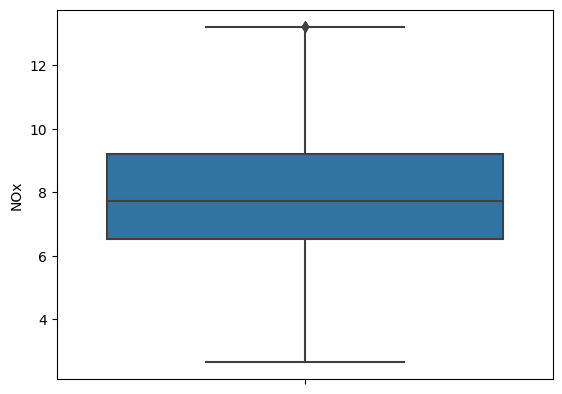

In [36]:
sns.boxplot(y = measurements_filtered['NOx'])

<AxesSubplot: xlabel='NOx', ylabel='Count'>

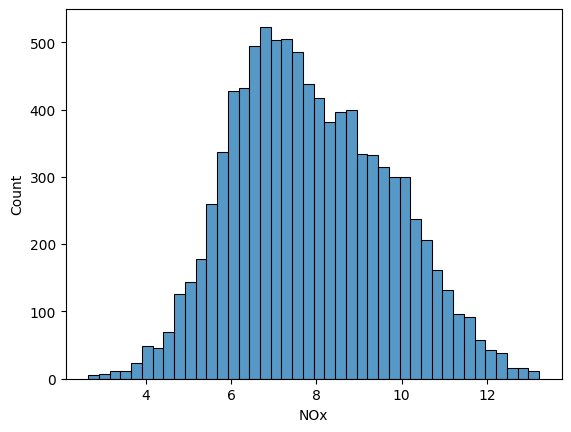

In [37]:
sns.histplot(measurements_filtered['NOx'])

In [38]:
measurements_filtered['C2H3NO5'].describe()

count    9355.000000
mean        1.207104
std         0.592900
min         0.053630
25%         0.787750
50%         1.069460
75%         1.486690
max         3.089670
Name: C2H3NO5, dtype: float64

<AxesSubplot: ylabel='C2H3NO5'>

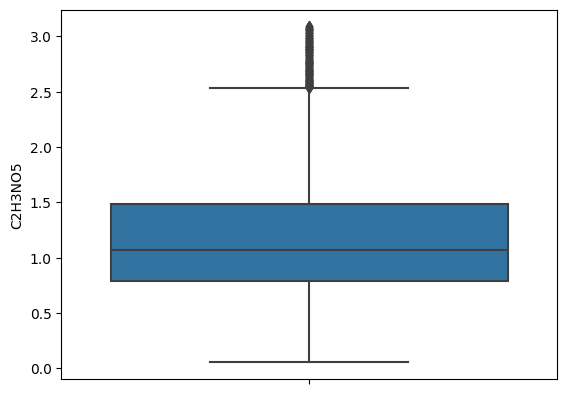

In [39]:
sns.boxplot(y = measurements_filtered['C2H3NO5'])

<AxesSubplot: xlabel='C2H3NO5', ylabel='Count'>

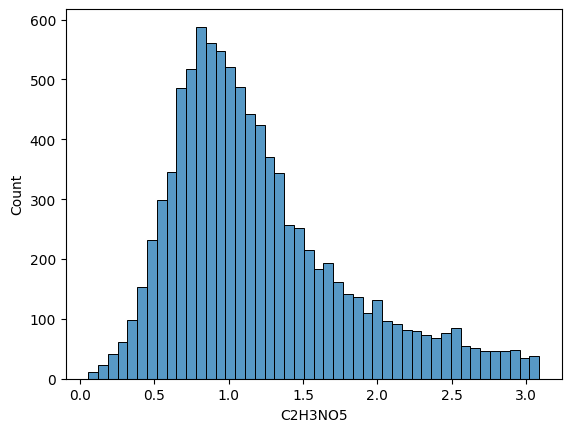

In [40]:
sns.histplot(measurements_filtered['C2H3NO5'])

## Párová analýza po úprave

In [41]:
correlation_dropped = measurements_filtered.corr()
correlation_dropped

,warning,PM10,PM2.5,NOx,H2CO,C2H3NO5,SO2,CH4,Pb,NH3,CO,PAHs,O3,CFCs,PRES,TEMP,longitude,latitude
warning,1.000000,-0.021894,0.004232,-0.665885,0.006058,-0.007047,0.009859,0.317599,-0.005379,0.016691,-0.017779,-0.276256,-0.330847,-0.020811,0.011829,0.001251,-0.015928,-0.004276
PM10,-0.021894,1.000000,-0.003512,0.129409,0.012761,0.806091,0.008893,-0.166237,0.014708,0.001851,-0.027310,-0.126966,-0.053484,-0.005902,0.016530,-0.012950,0.017908,-0.009811
PM2.5,0.004232,-0.003512,1.000000,-0.010490,-0.002221,-0.003913,-0.003143,0.010204,-0.000761,0.017835,-0.009257,0.012162,0.011699,-0.005433,-0.000633,-0.006016,0.010325,0.020760
NOx,-0.665885,0.129409,-0.010490,1.000000,0.000045,0.094751,0.002816,-0.091523,0.003113,-0.000500,-0.170906,0.319309,0.294104,0.031985,-0.013547,-0.003007,0.004898,0.012378
H2CO,0.006058,0.012761,-0.002221,0.000045,1.000000,0.019230,-0.018802,0.008395,-0.013635,-0.006485,-0.010582,-0.002233,-0.000531,-0.002565,-0.004603,-0.012578,0.008586,-0.002192
C2H3NO5,-0.007047,0.806091,-0.003913,0.094751,0.019230,1.000000,0.002991,-0.097327,0.011081,0.008492,-0.063629,-0.082890,-0.017930,-0.004984,0.012166,-0.010635,0.019272,-0.006692
SO2,0.009859,0.008893,-0.003143,0.002816,-0.018802,0.002991,1.000000,0.002793,-0.013263,0.009407,0.008028,-0.013629,0.001957,-0.014604,0.004518,0.002890,0.009519,-0.007382
CH4,0.317599,-0.166237,0.010204,-0.091523,0.008395,-0.097327,0.002793,1.000000,-0.007131,0.012008,-0.418869,-0.068035,0.270356,-0.004005,-0.014890,-0.009571,-0.009900,0.013594
Pb,-0.005379,0.014708,-0.000761,0.003113,-0.013635,0.011081,-0.013263,-0.007131,1.000000,0.006743,0.012394,-0.021212,-0.016764,0.003244,0.011033,-0.006529,0.008552,-0.016067
NH3,0.016691,0.001851,0.017835,-0.000500,-0.006485,0.008492,0.009407,0.012008,0.006743,1.000000,-0.011186,-0.017114,-0.012438,-0.004320,-0.002048,0.006370,0.010391,0.004684


<AxesSubplot: >

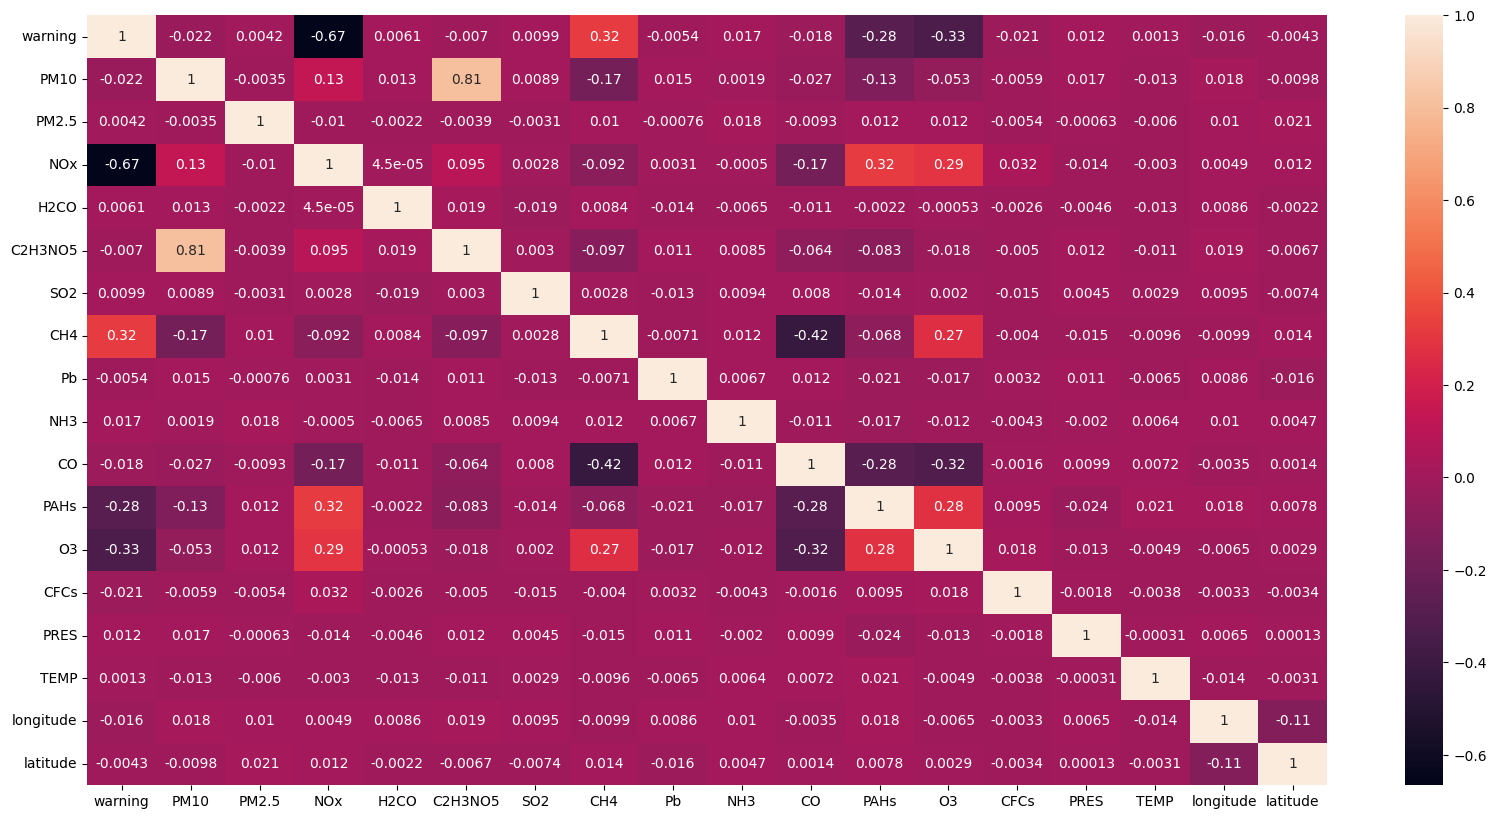

In [42]:
plt.figure(figsize=(20,10))
sns.heatmap(correlation_dropped, annot=True)

Po odstraneni outliers vo vsetkych prvkoch, vidime ze sa korelacia nasich vybranych prvkov nejako zasadne nezmenila. Jeden prvok sa vsak zmenil viac ako ostatne. Vo vypise vyssie je vidiet, ze pri prvku PAHs sa nachadzalo viacej outliers ako pri ostatnych vybranych.

In [43]:
fig = plt.figure(figsize=(20, 10))
sns.pairplot(measurements_filtered, vars=['PM10', 'PM2.5', 'NOx', 'H2CO', 'C2H3NO5','SO2',
       'CH4','Pb', 'NH3', 'CO', 'PAHs', 'O3', 'CFCs', 'PRES', 'TEMP'], hue='warning')

array([[<AxesSubplot: title={'center': 'PM10'}>,
        <AxesSubplot: title={'center': 'PM2.5'}>,
        <AxesSubplot: title={'center': 'NOx'}>,
        <AxesSubplot: title={'center': 'H2CO'}>],
       [<AxesSubplot: title={'center': 'C2H3NO5'}>,
        <AxesSubplot: title={'center': 'SO2'}>,
        <AxesSubplot: title={'center': 'CH4'}>,
        <AxesSubplot: title={'center': 'Pb'}>],
       [<AxesSubplot: title={'center': 'NH3'}>,
        <AxesSubplot: title={'center': 'CO'}>,
        <AxesSubplot: title={'center': 'PAHs'}>,
        <AxesSubplot: title={'center': 'O3'}>],
       [<AxesSubplot: title={'center': 'CFCs'}>,
        <AxesSubplot: title={'center': 'PRES'}>,
        <AxesSubplot: title={'center': 'TEMP'}>, <AxesSubplot: >]],
      dtype=object)

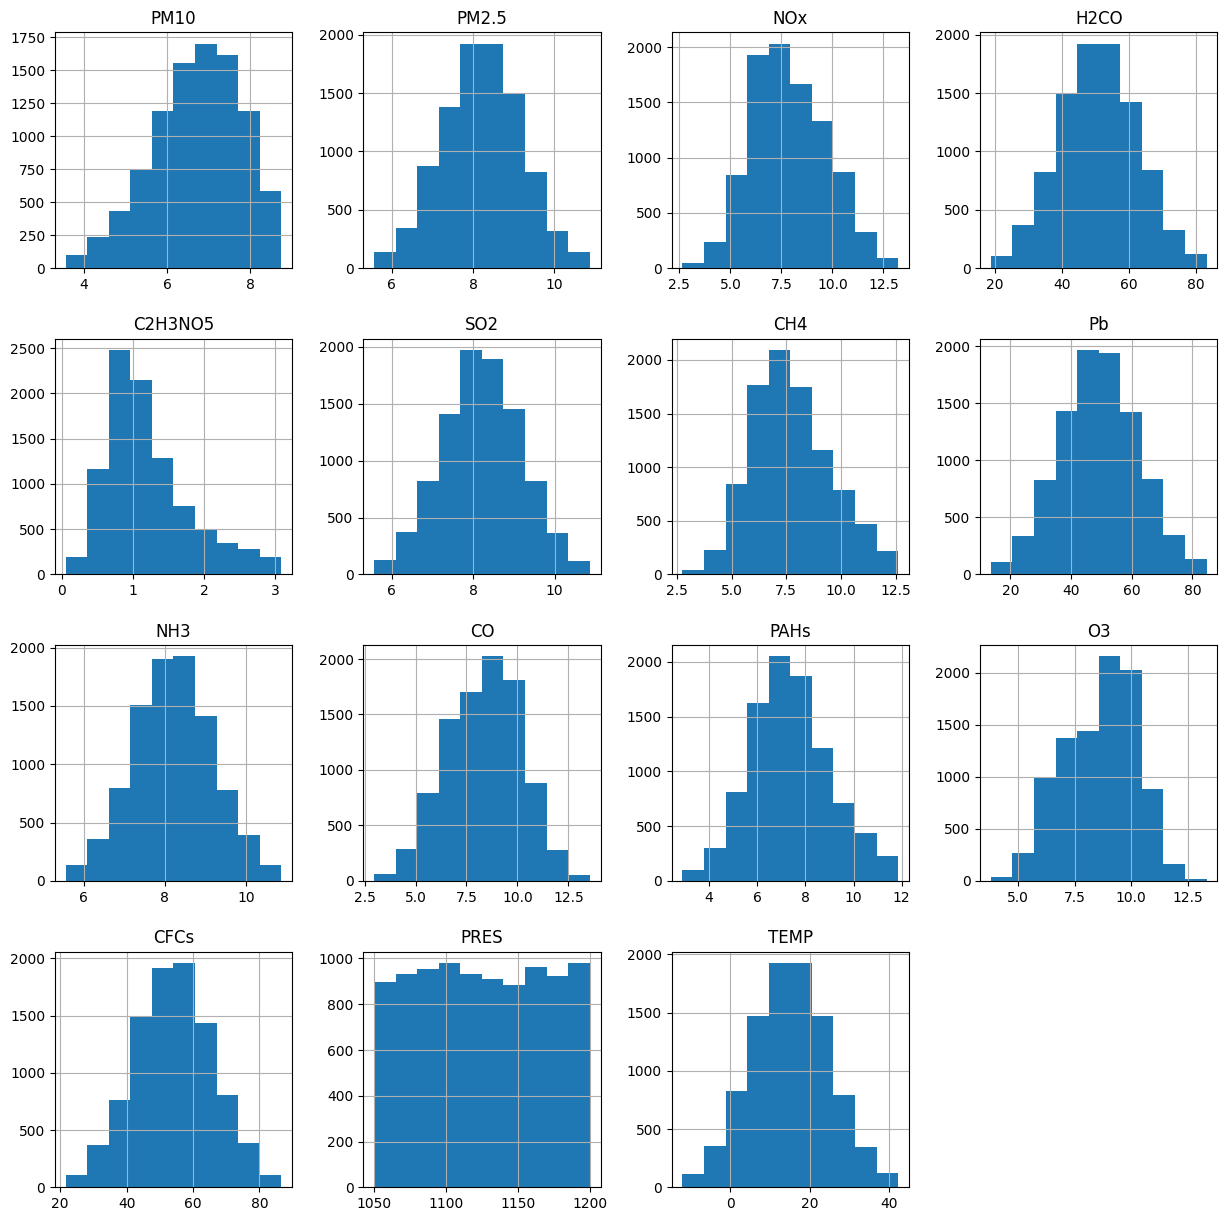

In [44]:
measurements_filtered[['PM10', 'PM2.5', 'NOx', 'H2CO', 'C2H3NO5','SO2',
       'CH4','Pb', 'NH3', 'CO', 'PAHs', 'O3', 'CFCs', 'PRES', 'TEMP']].hist(figsize=(15,15))

V grafe vyššie môžeme vidiet počty jednotlivých hodnôt prvkov po prečistanení dát.

## Párova analýza predikovanej premennej a potenciálnymi prediktormi.

Correlation:  -0.6658853100023683


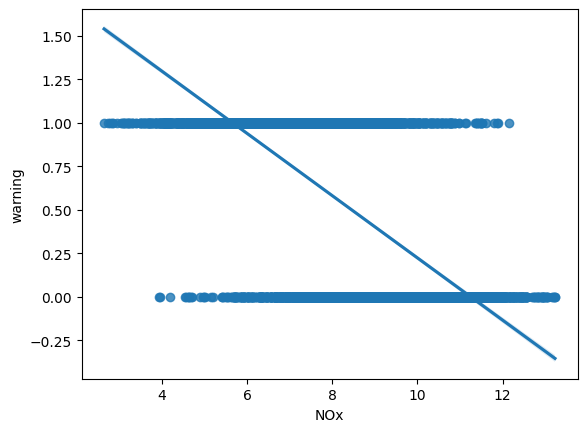

In [45]:
sns.regplot(x='NOx', y='warning', data=measurements_filtered)
print("Correlation: ", measurements_filtered.warning.corr(measurements_filtered.NOx))

Tu môžeme vidieť negatívnu koreláciu prvku *NOx* s predikovanou premennou *warning*. Taktiež je to možné vidieť aj na heatmape.

Correlation:  0.31759874396159926


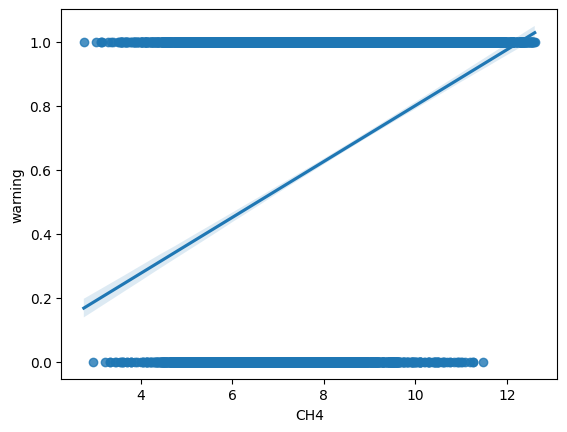

In [46]:
sns.regplot(x='CH4', y='warning', data=measurements_filtered)
print("Correlation: ", measurements_filtered.warning.corr(measurements_filtered.CH4))

Tu môžeme vidieť pozitívnu koreláciu prvku *CH4* s predikovanou premennou *warning*.

Correlation:  -0.007046562566646802


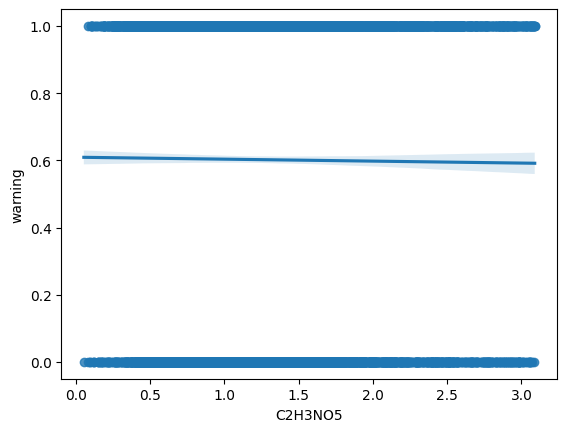

In [47]:
sns.regplot(x='C2H3NO5', y='warning', data=measurements_filtered)
print("Correlation: ", measurements_filtered.warning.corr(measurements_filtered.C2H3NO5))

Medzi prvkom *C2H3NO5* a predikovanou premennou *warning* neexistuje žiadna výrazná korelácia.

## Parova analyza dvoch atribútov

Correlation:  0.31930895632154793


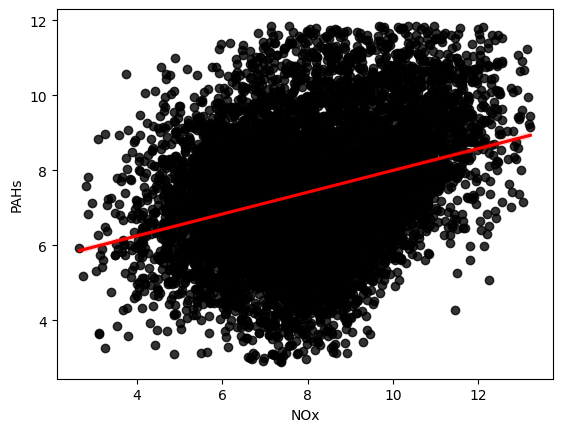

In [48]:
sns.regplot(x='NOx', y='PAHs', data=measurements_filtered, scatter_kws={"color": "black"}, line_kws={"color": "red"})
print("Correlation: ", measurements_filtered.NOx.corr(measurements_filtered.PAHs))

Graf medzi prvkami *NOx* a *PAHs* vyjadruje pozitívnu koreláciu. Táto informácia nám bude možno v budúcnosti užitočná.

#  Úprava dát

Stĺpec location sme si rozdelili na 2 a to continent a nations aby sme mohli lepšie spracovávať dáta pre väčšie celky, nie len pre každý štát jednotlivo.

In [49]:
stations[['area', 'nation']] = stations['location'].str.split('/',1, expand=True)
stations=stations.drop(columns='location')
stations=stations[['area','nation','longitude','latitude','code','QoS','revision']]
stations

C:\Users\filip\AppData\Local\Temp\ipykernel_26052\620727370.py:1: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  stations[['area', 'nation']] = stations['location'].str.split('/',1, expand=True)


,area,nation,longitude,latitude,code,QoS,revision
0,Europe,Madrid,-3.67029,37.13548,ES,excellent,"09/03/2019, 00:00:00"
1,Europe,Moscow,38.02486,55.64776,RU,good,2016/02/19
2,America,Chicago,-96.67834,34.77453,US,accep,2021-12-01
3,Europe,Madrid,-1.60452,42.06166,ES,maintenance,2013/10/10
4,Europe,Rome,14.66737,41.55947,IT,accep,2014-03-19
...,...,...,...,...,...,...,...
1001,Europe,Paris,5.03586,43.83125,FR,average,2018-08-15
1002,Asia,Bishkek,73.00000,40.93333,KG,good,2013/09/15
1003,America,Chicago,-89.64066,40.56754,US,maitennce,"04/06/2016, 00:00:00"
1004,America,Caracas,-67.33122,10.22677,VE,good,18 Mar 2017


In [50]:
before=len(stations)
stations=stations.drop_duplicates()
print("Počet duplikátov: ",before-len(stations))

Počet duplikátov:  0


In [51]:
before=len(stations)
stations=stations.dropna()
print("Počet nulových záznamov: ",before-len(stations))

Počet nulových záznamov:  0


Pri stĺpci revision sme upravovali dátumy na jednotnú formu. Bolo by vhodné aby tento stĺpec bol typu date a nie typu object.
V stĺpci QoS sa vyskytovali dve chyby a to v slovách acceptable a maintenance.

In [52]:
for a in stations['revision']:
    b=pd.to_datetime(a,dayfirst=True).date().strftime('%d/%m/%Y')
    stations['revision']= stations['revision'].replace(a,b)

for a in stations['QoS']:
    if(a=='accep'):
        stations['QoS']= stations['QoS'].replace(a,'acceptable')
        
    if(a=='maitennce'):
        stations['QoS']= stations['QoS'].replace(a,'maintenance')
    

In [53]:
print(stations)

         area    nation  longitude  latitude code          QoS    revision
0      Europe    Madrid   -3.67029  37.13548   ES    excellent  09/03/2019
1      Europe    Moscow   38.02486  55.64776   RU         good  19/02/2016
2     America   Chicago  -96.67834  34.77453   US   acceptable  01/12/2021
3      Europe    Madrid   -1.60452  42.06166   ES  maintenance  10/10/2013
4      Europe      Rome   14.66737  41.55947   IT   acceptable  19/03/2014
...       ...       ...        ...       ...  ...          ...         ...
1001   Europe     Paris    5.03586  43.83125   FR      average  15/08/2018
1002     Asia   Bishkek   73.00000  40.93333   KG         good  15/09/2013
1003  America   Chicago  -89.64066  40.56754   US  maintenance  04/06/2016
1004  America   Caracas  -67.33122  10.22677   VE         good  18/03/2017
1005  America  New_York  -78.19444  38.91817   US         good  28/11/2016

[1006 rows x 7 columns]


## Analýza po úprave

Europe       320
America      290
Asia         289
Africa        84
Australia     10
Pacific        7
Indian         6
Name: area, dtype: int64


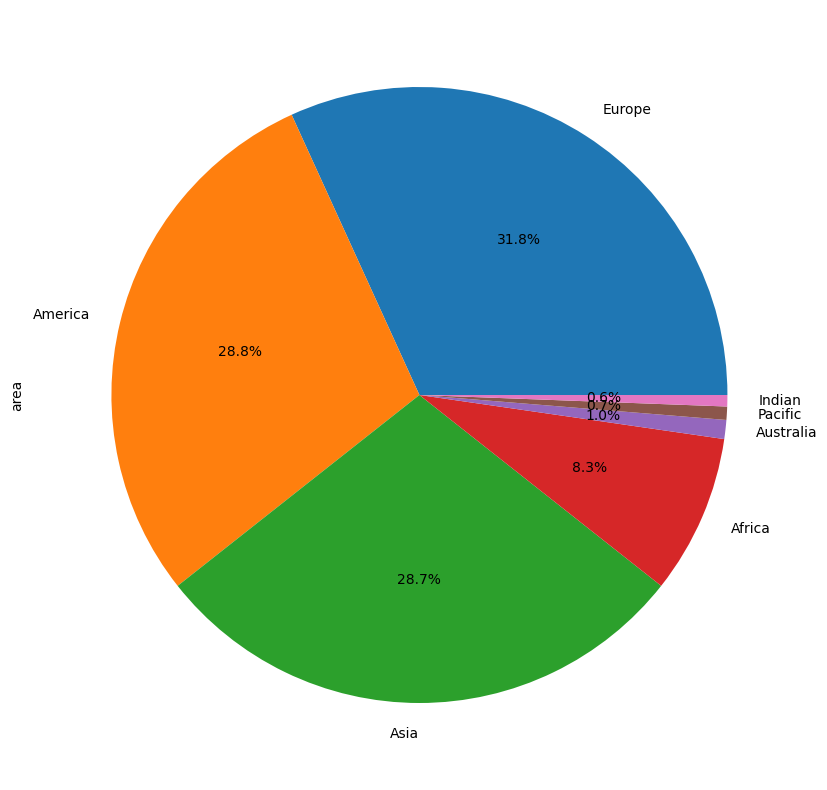

In [54]:
stations.area.value_counts().plot(kind='pie', figsize=(15,10),autopct='%1.1f%%')
print(stations.area.value_counts())

# Overenie hypotez

## HYPOTEZA 1 : Tlak ovlypňuje čistotu prostredia.

<AxesSubplot: xlabel='warning', ylabel='PRES'>

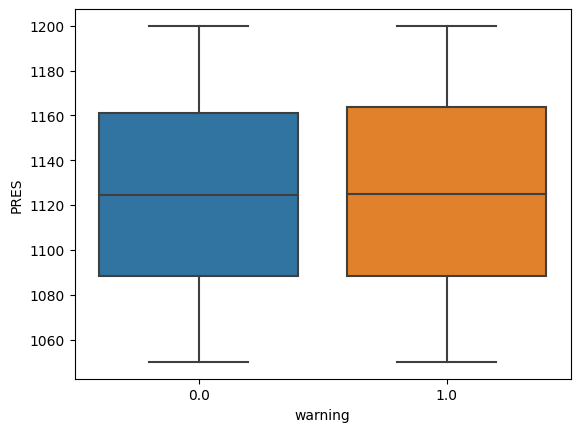

In [221]:
sns.boxplot(x=measurements_filtered['warning'],y=measurements_filtered['PRES'])

Na prvý pohľad sa nejaví že by sa hodnoty nejak zásadne líšili,môžeme predpokladať že súvis týchto hodnôt bude zanedbateĺný. Taktiež vďaka predchádzajúcim úpravám sa už v dátach nenachádzajú outlieri.
Následne si zobrazíme jednotlivé warning hodnoty pre tlak.

In [210]:
good=measurements_filtered[measurements_filtered['warning']==0].PRES
bad=measurements_filtered[measurements_filtered['warning']==1].PRES

<AxesSubplot: xlabel='PRES', ylabel='Count'>

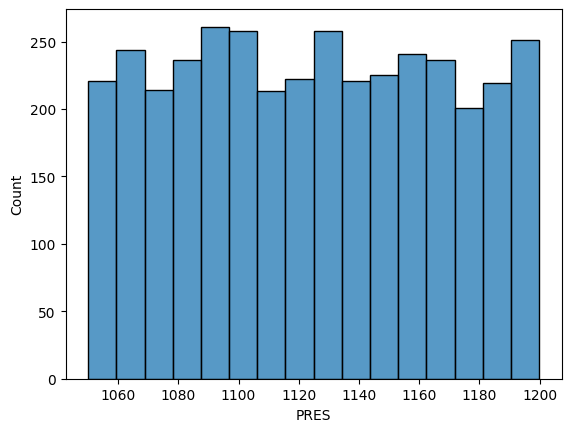

In [211]:
sns.histplot(good)

<AxesSubplot: xlabel='PRES', ylabel='Count'>

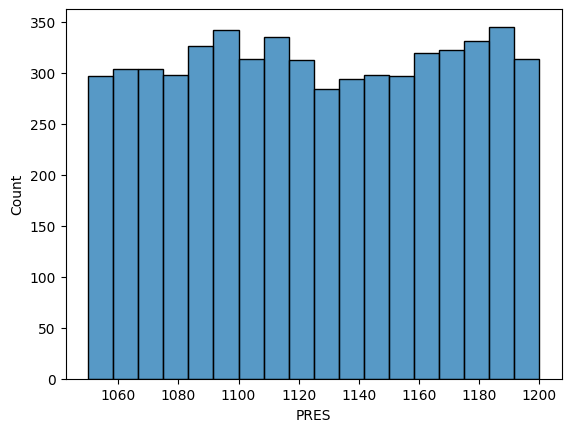

In [212]:
sns.histplot(bad)

In [213]:
good.describe()

count    3721.000000
mean     1124.612207
std        43.168285
min      1050.045320
25%      1088.221550
50%      1124.617300
75%      1161.239330
max      1199.857500
Name: PRES, dtype: float64

In [214]:
bad.describe()

count    5634.000000
mean     1125.659081
std        43.412832
min      1050.005850
25%      1088.512645
50%      1124.739095
75%      1163.905493
max      1199.982040
Name: PRES, dtype: float64

<AxesSubplot: xlabel='PRES', ylabel='Count'>

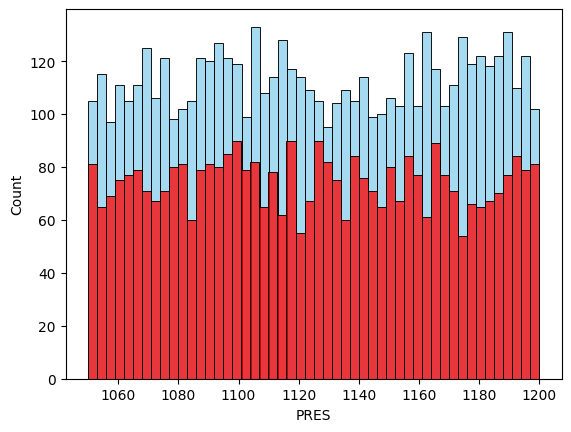

In [215]:
sns.histplot(bad,bins=50,color='skyblue')
sns.histplot(good,bins=50,color='red')

Graf znázorňuje početnosť jednotlivých meraní pre dané tlaky,viac meraní bolo pri lepšej kvalite ovzdušia.

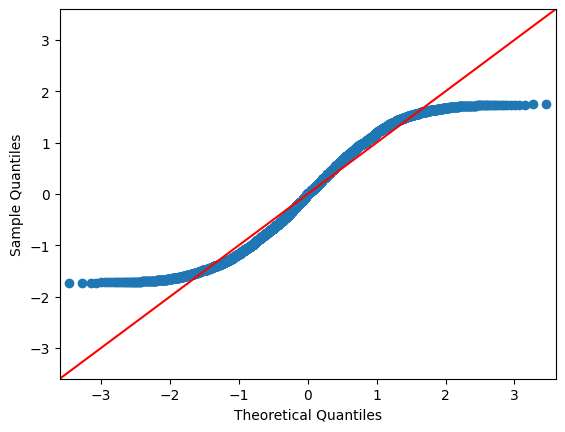

In [216]:
graf=sm.ProbPlot(good,fit=True).qqplot(line='45')

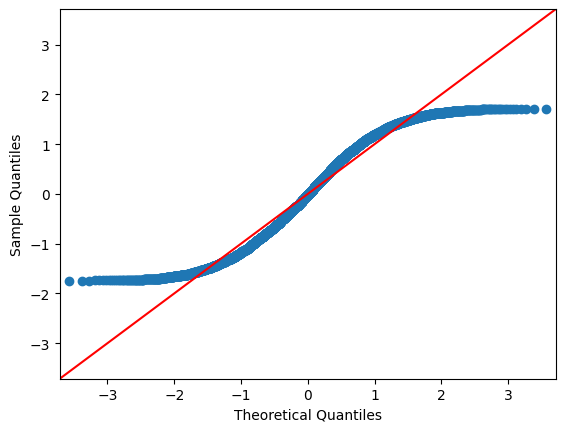

In [217]:
graf=sm.ProbPlot(bad,fit=True).qqplot(line='45')

Vďaka qq plotu sme zistili že dáta sú rovnako rozdelené. Ďalej potrebujeme na základe rozdelenia zistiť ako budeme dáta ďalej spracovávať.

In [218]:
stats.shapiro(good)

ShapiroResult(statistic=0.9563882946968079, pvalue=5.245099286660027e-32)

Shapirov test dokáže spracovať maximálne 5000 dát, preto si dáta upravíme.

In [219]:
bad=measurements_filtered[measurements_filtered['warning']==1].PRES
bad=bad[bad.between(bad.quantile(0.06),bad.quantile(0.94))]
stats.shapiro(bad)

ShapiroResult(statistic=0.9523927569389343, pvalue=2.058425832470594e-37)

V oboch prípadoch nám vyšla hodnota p menšia ako 0.05 čo znamená že hypotézu zamietame a zároveň môžme povedať že naše dáta nie sú z normálneho rozdelenia. Z tohto dôvodu použijeme man whitneyho test.

In [220]:
stats.mannwhitneyu(good,bad)

MannwhitneyuResult(statistic=9078949.5, pvalue=0.2081212020271248)

Na základe p value môžme povedať že rozdiel nie je signifikantný a teda tlak nemá pre nás významný vplyv na stav ovzdušia.

## HYPOTEZA 2 : Ak je hodnota prvku NOx menšia ako 8, ovzdušie je pravdepodobne znečistené.

<AxesSubplot: xlabel='warning', ylabel='NOx'>

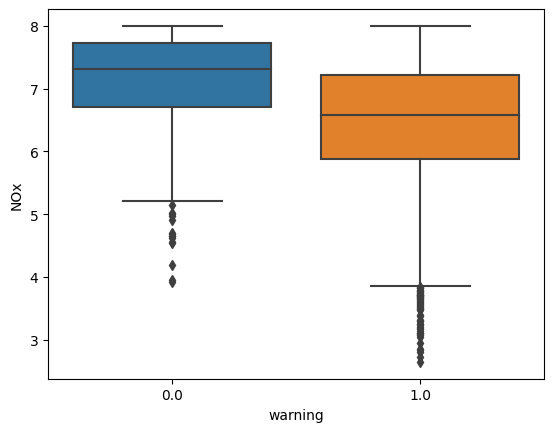

In [191]:
air_quality = measurements_filtered[(measurements_filtered.NOx < 8)]
sns.boxplot(x = 'warning', y = 'NOx', data = air_quality)

In [192]:
air_quality['warning'].value_counts()

1.0    4599
0.0     592
Name: warning, dtype: int64

<AxesSubplot: xlabel='NOx', ylabel='Count'>

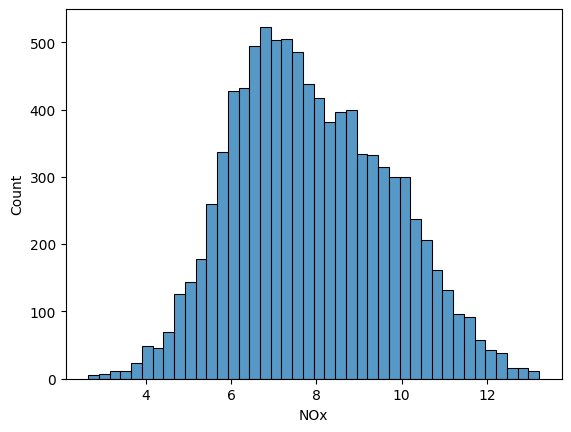

In [193]:
sns.histplot(measurements_filtered['NOx'])

In [222]:
good = air_quality[air_quality['warning']==0].NOx
bad = air_quality[air_quality['warning']==1].NOx

<AxesSubplot: xlabel='NOx', ylabel='Count'>

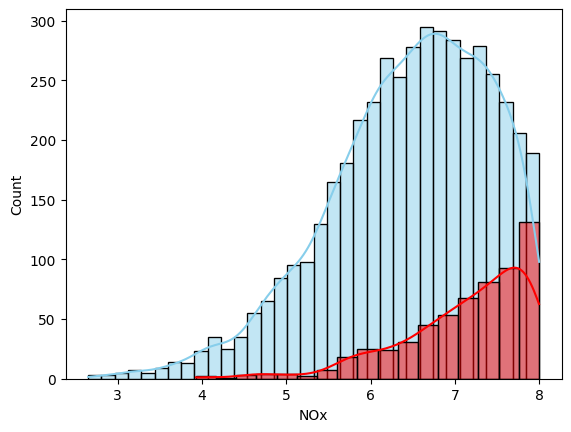

In [223]:
sns.histplot(bad, kde=True, color="skyblue")
sns.histplot(good, kde=True, color="red")

Z týchto stĺpcových grafov vidíme, že v daných dátach máme outlierov. Na dokázanie tejto hypotézy sme sa rozhodli ich odstrániť.

In [224]:
good1 = good[good.between(good.quantile(0.15), good.quantile(0.85))]
bad1 = bad[bad.between(bad.quantile(0.15), bad.quantile(0.85))]

<AxesSubplot: xlabel='NOx', ylabel='Count'>

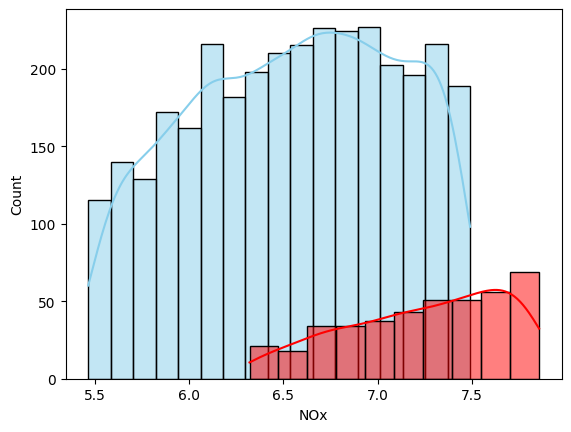

In [225]:
sns.histplot(bad1, kde=True, color="skyblue")
sns.histplot(good1, kde=True, color="red")

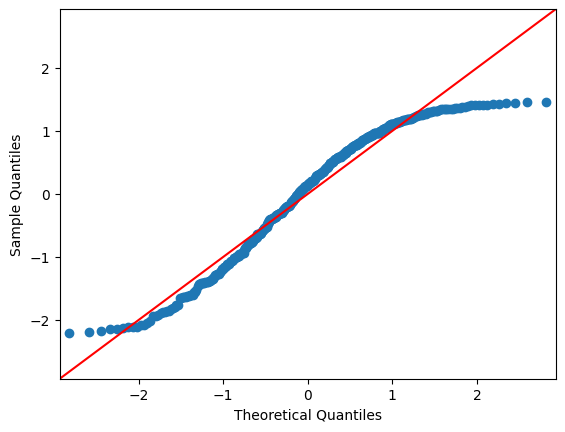

In [226]:
x = sm.ProbPlot(good1, fit=True).qqplot(line='45')

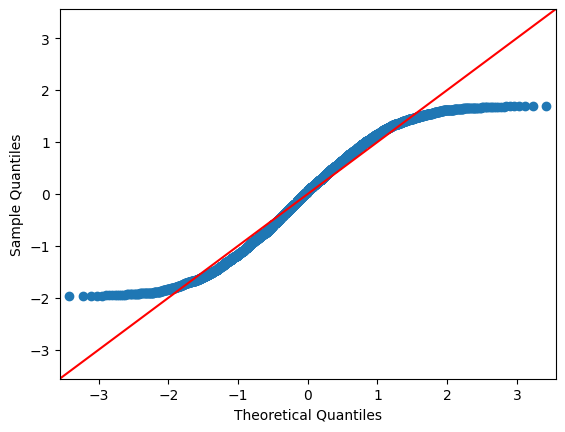

In [199]:
y = sm.ProbPlot(bad1, fit=True).qqplot(line='45')

Z QQ plotu vidíme, že oba datasety pochádzajú z rovnakého rozdelenia. Treba ešte overiť, z akého rozdelenia dáta pochádzajú. Použijeme na to Shapirov štatistický test. 

In [200]:
stats.shapiro(good)

ShapiroResult(statistic=0.893385112285614, pvalue=7.882265449328889e-20)

In [201]:
stats.shapiro(bad)

ShapiroResult(statistic=0.9623926281929016, pvalue=5.516320583946475e-33)

Pre obe dáta platí $p < 0,05$ , to znamená, že našu hypotézu zamietame. Teraz použijeme mannwhitneyu test, kde zistíme, že či je rozdiel medzi týmito dvoma datasetmi signifikantný.

In [227]:
stats.mannwhitneyu(good, bad)

MannwhitneyuResult(statistic=1932391.0, pvalue=3.6238704451801846e-62)

In [207]:
sms.DescrStatsW(good).tconfint_mean()

(7.054187488662018, 7.1773176802569)

In [208]:
sms.DescrStatsW(bad).tconfint_mean()

(6.438113708342388, 6.493888644342975)

Kedže $p < 0,001$, pravdepodobnosť chyby 1. rádu (že  𝐻0  je pravdivá a my ju zamietame) je menej ako 1 promile. To znamená, že rozdiel množstva prvku NOx v dobrom a zlom ovzduší je signifikantný.